In [1]:
import numpy as np
import math

Model with variable layers variable units and variable activation 

In [2]:
class Model:
    def __init__(self,inp_features,layers=3,units=[10,5,1],activations=['sig','sig','sig'],WB=1):
        '''
        WB -> Weight multiplier
        activations -> must be initialized 
    
        '''
        self.W = [np.random.randn(units[0],inp_features)*WB]
        self.b = [np.zeros((1,units[0]))]
        for each in units[1:]:
            self.W.append(np.random.randn(each,self.W[units.index(each)-1].shape[0])*WB)
            self.b.append(np.zeros((1,each)))
        #self.activations = activations
        self.layers = layers;
        self.activations = activations

        self.relu_multiplier = 0.01 # Relu multiplier for supressing big floats
        
        """
        layers -> No. of layers 
        activation -> list of activations as per layer
        
        """
    
    def fit(self,X,y,iters=100,lr=0.01,batch_size=64):
        self.lr = lr
        batches = math.ceil(len(X)/batch_size)
        loss = []
        for each in range(iters):
            completed = len(X)
            batch_loss = []
            start = 0
            while(completed):
                end = start + min(batch_size,completed)
                completed -= (end-start)
                
                self.X = X[start:end]
                self.y = y[start:end]
                batch_loss.append(self.loss())
                self.update_grads()

                #print(f'Comp : {completed} , loss : {batch_loss[-1]}')

                start = end
            
            loss.append(np.mean(batch_loss))
            
            print(f'epoch : {each} , loss : {loss[each]}')
        return loss
    
    def update_grads(self):
        grads = self.grads()
        for w,grad in zip(self.W,grads[:len(self.W)]):
            w -= grad * self.lr
            
        for w,grad in zip(self.b,grads[len(self.W):]):
            w -= grad * self.lr
            
    def partial_of_activation(self,A,n):
        if(self.activations[n] == 'sig'):
            return A*(1-A)
        elif(self.activations[n] == 'tanh'):
            return 1 - (A**2)
        else:
            A[A>0] = 1
            return A*self.relu_multiplier
            
    def grads(self):
        params = self.forward_pass(self.X)
        common = 1
        g_w = []
        g_b = []
        for n in range(self.layers-1,-1,-1):
            if(n==self.layers-1):
                common = common * (params[n] - self.y)
                dw = np.dot(common.T,params[n-1])
                g_w.append(dw)
                g_b.append(np.mean(common,axis=0,keepdims=True))
                continue
            
            common = np.dot(common,self.W[n+1]) * self.partial_of_activation(params[n],n)
            if(n==0):
                dw = np.dot(common.T,self.X)
            else:
                dw = np.dot(common.T,params[n-1])
            
            db = np.mean(common,axis=0,keepdims=True)
            
            g_w.append(dw)
            g_b.append(db)
        
        g_w.reverse()
        g_b.reverse()
        return g_w+g_b
    
    def activate(self,Z,index):
        if(self.activations[index]=='sig'):
            return 1/(1 + np.exp(-Z))
        elif(self.activations[index]=='tanh'):
            a = np.exp(Z)
            b = np.exp(-Z)
            return (a-b)/(a+b)
        else:
            Z[Z<0] = 0
            return Z*self.relu_multiplier
    
    def forward_pass(self,X):
        outs = []
        A = 0
        for layer in range(self.layers):
            if not layer:
                A = self.activate(np.dot(X,self.W[layer].T) + self.b[layer],layer)
            else:
                A = self.activate(np.dot(A,self.W[layer].T) + self.b[layer],layer)
            outs.append(A)
            
        return outs
    
    def loss(self):
        yh = self.forward_pass(self.X)[-1]
#        ll = -(self.y*np.log(yh) + (1-self.y)*np.log(1-yh))
        ll = np.mean((self.y - yh)**2)
        if np.isnan(ll):
            return 0
        return ll
    
    def predict_point(self,X):
        return (self.forward_pass(X)[-1] > 0.5).astype('int')
    
    def score(self,X,y):
        yh = self.predict_point(X)
        return np.mean(yh==y)
    

In [3]:
from sklearn.datasets import make_moons,make_circles
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [5]:
def createSpiral(N):
    N = int(N/2)
    theta = np.sqrt(np.random.rand(N))*2*np.pi # np.linspace(0,2*pi,100)

    r_a = 2*theta + np.pi
    data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
    x_a = data_a + np.random.randn(N,2)
    y_a = np.zeros((N,))

    r_b = -2*theta - np.pi
    data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
    x_b = data_b + np.random.randn(N,2)
    y_b = np.ones((N,))
    
    X = np.concatenate((x_a,x_b),axis=0)
    y = np.concatenate((y_a,y_b),axis=0)
    
    X,y = shuffle(X,y)
    return X,y
    

In [4]:
from tensorflow import keras

Init Plugin
Init Graph Optimizer
Init Kernel


In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1,784).astype('float64') /255.0
X_test = X_test.reshape(-1,784).astype('float64') /255.0

In [6]:
def toprob(y):
    lst = []
    for each in y:
        a = np.zeros(10)
        a[each] = 1
        lst.append(a)
    return np.array(lst).astype('float64')
        

In [7]:
y_train = toprob(y_train)
y_test = toprob(y_test)

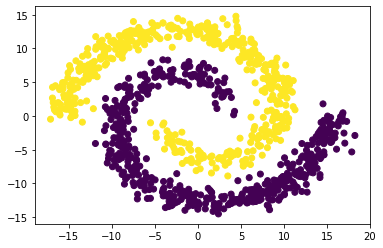

In [26]:
plt.scatter(X[:,0],X[:,1],c=y)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

y_train = y_train[...,np.newaxis]
y_test = y_test[...,np.newaxis]

In [10]:
len(X_train) / 64

937.5

In [8]:
model = Model(784,layers=3,units=[128,32,10],activations=['r','r','sig']) # By default ReLU activation

In [9]:
hist = model.fit(X_train,y_train,iters=30,batch_size=1024)

epoch : 0 , loss : 0.15001693416626974
epoch : 1 , loss : 0.09240302236747681
epoch : 2 , loss : 0.09092086984685097
epoch : 3 , loss : 0.08803121829341244
epoch : 4 , loss : 0.081341835589488
epoch : 5 , loss : 0.0718289655158403
epoch : 6 , loss : 0.06337908763344914
epoch : 7 , loss : 0.0562926399952419
epoch : 8 , loss : 0.05103495519030437
epoch : 9 , loss : 0.04686293170723695
epoch : 10 , loss : 0.04329743069229204
epoch : 11 , loss : 0.040287287081173656
epoch : 12 , loss : 0.037674577252066674
epoch : 13 , loss : 0.03527848816255433
epoch : 14 , loss : 0.03306050428807721
epoch : 15 , loss : 0.031092446361819622
epoch : 16 , loss : 0.029406234361545474
epoch : 17 , loss : 0.027959310934448325
epoch : 18 , loss : 0.026684484630405115
epoch : 19 , loss : 0.025530384321101104
epoch : 20 , loss : 0.024468020127414253
epoch : 21 , loss : 0.023482014006004023
epoch : 22 , loss : 0.022567724526955858
epoch : 23 , loss : 0.021725428143759953
epoch : 24 , loss : 0.020952469243197918
ep

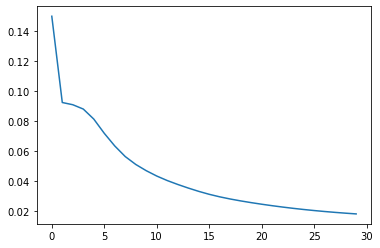

In [10]:
plt.plot(hist)

In [11]:
model.score(X_test,y_test)

0.97962

In [ ]:
# Representations For point data :

In [32]:
def make_grid(X,model):
    xmn, xmx = X[:, 0].min() - 1, X[:, 0].max() + 1
    ymn, ymx = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx,yy = np.meshgrid(np.arange(xmn,xmx,0.1),np.arange(ymn,ymx,0.1))
    XX_grid = np.c_[xx.ravel(),yy.ravel()]
    grid_preds = model.predict_point(XX_grid)
    grid_preds = grid_preds.reshape(xx.shape)
    return xx,yy,grid_preds

In [33]:
xx,yy,grid_preds = make_grid(X,model)

In [34]:
preds = model.predict_point(X_test)

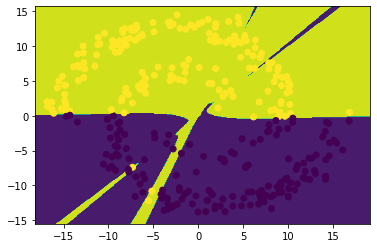

In [35]:
plt.contourf(xx,yy,grid_preds)
plt.scatter(X_test[:,0],X_test[:,1],c=preds)

In [36]:
for each in range(len(preds)):
    if not preds[each]:
        preds[each] = 1
    else:
        preds[each] = 0

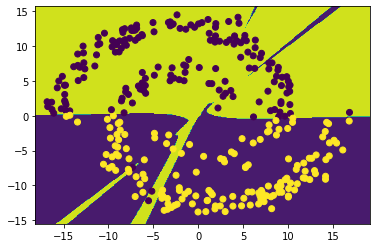

In [37]:
plt.contourf(xx,yy,grid_preds)
plt.scatter(X_test[:,0],X_test[:,1],c=preds)
# Reversed for better showcase        